## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=3964ba39-c0e5-4461-b3cf-140f3d49ce00
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:14<00:00, 58.4MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, regularizers

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [5]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [6]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.5825 - loss: 0.7288 - val_accuracy: 0.7042 - val_loss: 0.5591
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.7333 - loss: 0.5338 - val_accuracy: 0.7742 - val_loss: 0.4556
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8075 - loss: 0.4168 - val_accuracy: 0.8298 - val_loss: 0.3850
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8455 - loss: 0.3450 - val_accuracy: 0.8204 - val_loss: 0.3911
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 70ms/step - accuracy: 0.8883 - loss: 0.2687 - val_accuracy: 0.8272 - val_loss: 0.4725
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9286 - loss: 0.1734 - val_accuracy: 0.8346 - val_loss: 0.4349
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.9640 - loss: 0.0958 - val_accuracy: 0.8380 - val_loss: 0.5410
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9840 - loss: 0.0510 - 

## Plot accuracy and loss

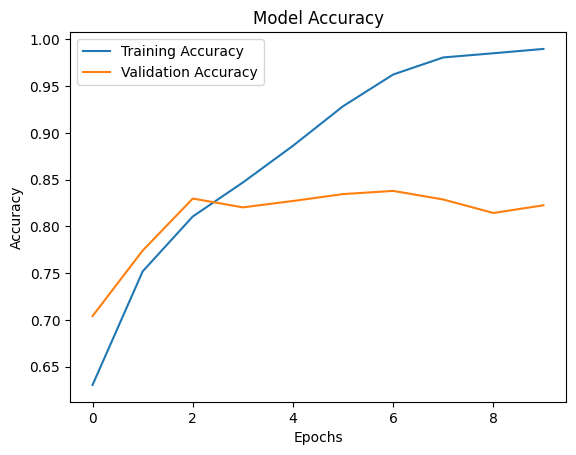

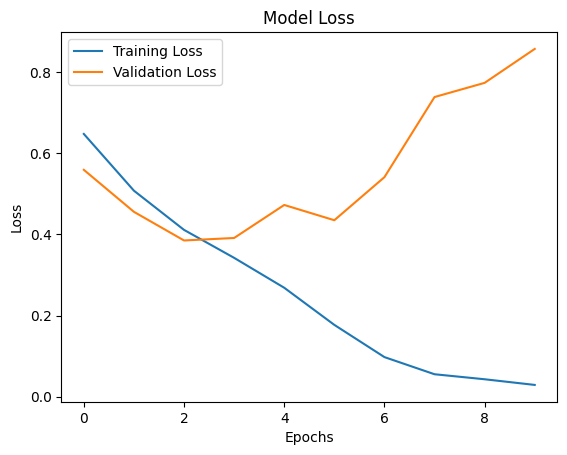

In [7]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Add regularization

In [8]:
#Build the model
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(1, activation= 'sigmoid')
])

model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.5927 - loss: 0.6857 - val_accuracy: 0.7522 - val_loss: 0.5055
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7636 - loss: 0.4900 - val_accuracy: 0.8032 - val_loss: 0.4197
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.8179 - loss: 0.4021 - val_accuracy: 0.8134 - val_loss: 0.4119
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.8474 - loss: 0.3441 - val_accuracy: 0.8320 - val_loss: 0.3811
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8884 - loss: 0.2618 - val_accuracy: 0.8302 - val_loss: 0.3907
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.9265 - loss: 0.1849 - val_accuracy: 0.8316 - val_loss: 0.4543
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9594 - loss: 0.1134 - val_accuracy: 0.8368 - val_loss: 0.5240
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9763 - loss: 0.0652 - 

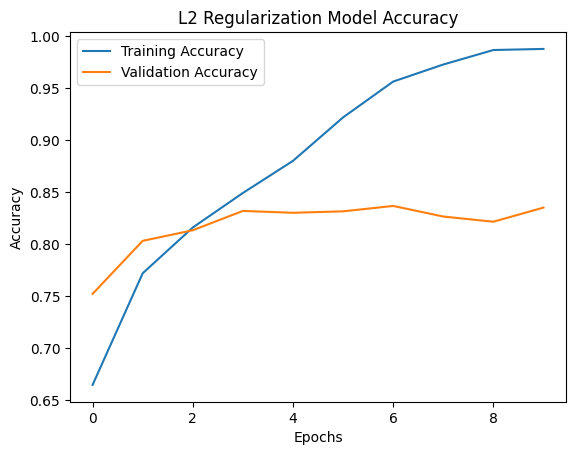

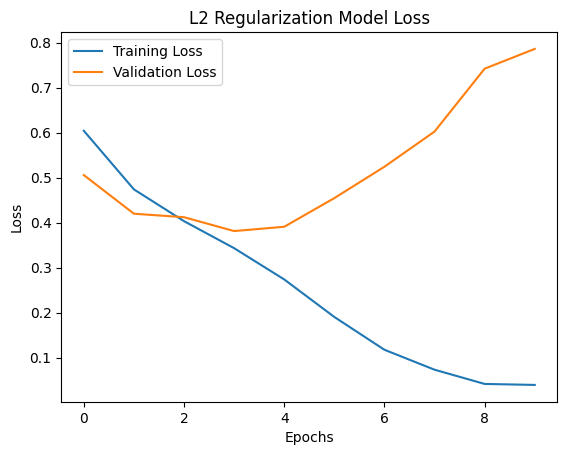

In [10]:
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('L2 Regularization Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('L2 Regularization Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Add Dropout

In [11]:
from tensorflow.keras import models, layers

# Build the model
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
history_model_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.5053 - loss: 0.7312 - val_accuracy: 0.4928 - val_loss: 0.6872
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5484 - loss: 0.6820 - val_accuracy: 0.6002 - val_loss: 0.6680
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6272 - loss: 0.6476 - val_accuracy: 0.6618 - val_loss: 0.6018
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.6910 - loss: 0.5885 - val_accuracy: 0.7430 - val_loss: 0.5051
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.7385 - loss: 0.5320 - val_accuracy: 0.7368 - val_loss: 0.5126
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7632 - loss: 0.4906 - val_accuracy: 0.7640 - val_loss: 0.4805
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7844 - loss: 0.4614 - val_accuracy: 0.8032 - val_loss: 0.4375
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8044 - loss: 0.4341 - 

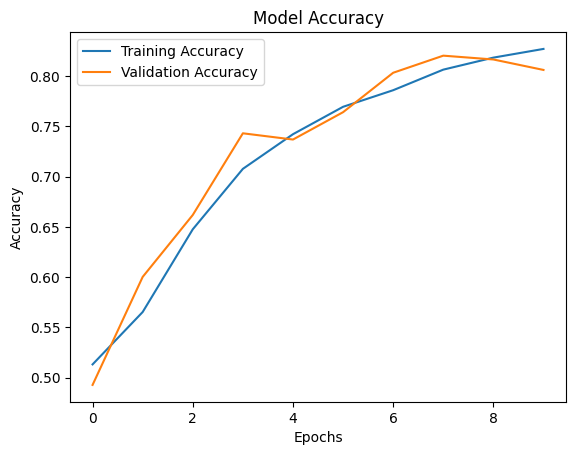

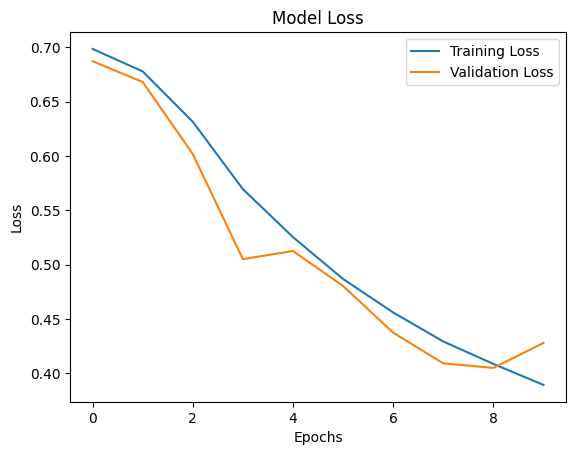

In [13]:
plt.plot(history_model_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_dropout.history['loss'], label='Training Loss')
plt.plot(history_model_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Configuration 1: Moderate Dropout rates and L2 regularization
model_combined_1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combined_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configuration 2: Higher Dropout rates and L2 regularization
model_combined_2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.7),
    layers.Dense(1, activation='sigmoid')
])

model_combined_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train Configuration 1
history_combined_1 = model_combined_1.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Train Configuration 2
history_combined_2 = model_combined_2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.5457 - loss: 0.8443 - val_accuracy: 0.6752 - val_loss: 0.6137
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6869 - loss: 0.6203 - val_accuracy: 0.7042 - val_loss: 0.5838
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.7017 - loss: 0.5965 - val_accuracy: 0.7246 - val_loss: 0.5629
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7203 - loss: 0.5826 - val_accuracy: 0.7510 - val_loss: 0.5499
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7453 - loss: 0.5542 - val_accuracy: 0.7466 - val_loss: 0.5425
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7454 - loss: 0.5546 - val_accuracy: 0.7144 - val_loss: 0.5693
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7450 - loss: 0.5524 - val_accuracy: 0.7586 - val_loss: 0.5362
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.7575 - loss: 0.5396 - 

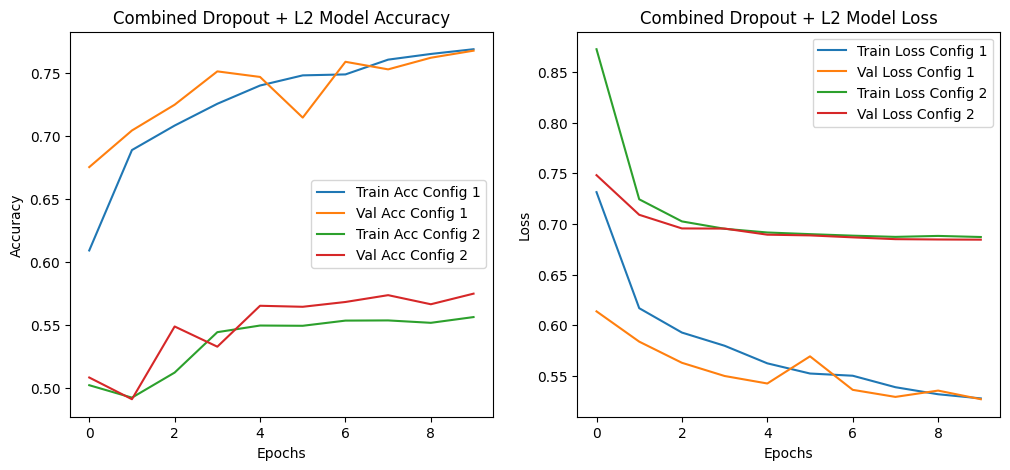

In [16]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_combined_1.history['accuracy'], label='Train Acc Config 1')
plt.plot(history_combined_1.history['val_accuracy'], label='Val Acc Config 1')
plt.plot(history_combined_2.history['accuracy'], label='Train Acc Config 2')
plt.plot(history_combined_2.history['val_accuracy'], label='Val Acc Config 2')
plt.title('Combined Dropout + L2 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_combined_1.history['loss'], label='Train Loss Config 1')
plt.plot(history_combined_1.history['val_loss'], label='Val Loss Config 1')
plt.plot(history_combined_2.history['loss'], label='Train Loss Config 2')
plt.plot(history_combined_2.history['val_loss'], label='Val Loss Config 2')
plt.title('Combined Dropout + L2 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Watch validation loss
    patience=3,              # Wait 3 epochs for improvement
    restore_best_weights=True  # Restore best weights after stopping
)

# Train model with EarlyStopping (example for model_combined_1)
history_combined_1 = model_combined_1.fit(
    train_generator,
    epochs=10,  # Large value; training will stop early if no improvement
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Train model with EarlyStopping (example for model_combined_2)
history_combined_2 = model_combined_2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8044 - loss: 0.4887 - val_accuracy: 0.7910 - val_loss: 0.4917
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8009 - loss: 0.4872 - val_accuracy: 0.8082 - val_loss: 0.4642
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8045 - loss: 0.4809 - val_accuracy: 0.7792 - val_loss: 0.5180
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8107 - loss: 0.4784 - val_accuracy: 0.7710 - val_loss: 0.5353
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8119 - loss: 0.4747 - val_accuracy: 0.8028 - val_loss: 0.4725
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5734 - loss: 0.6817 - val_accuracy: 0.5816 - val_loss: 0.6821
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.5646 - loss: 0.6839 - val_accuracy: 0.5926 - val_loss: 0.6797
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.5714 - loss: 0.6825 - 

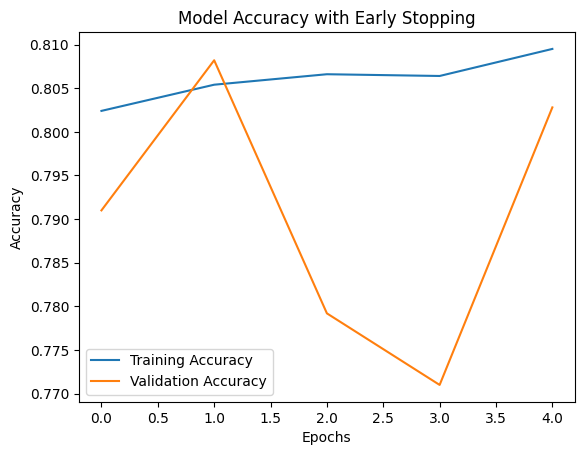

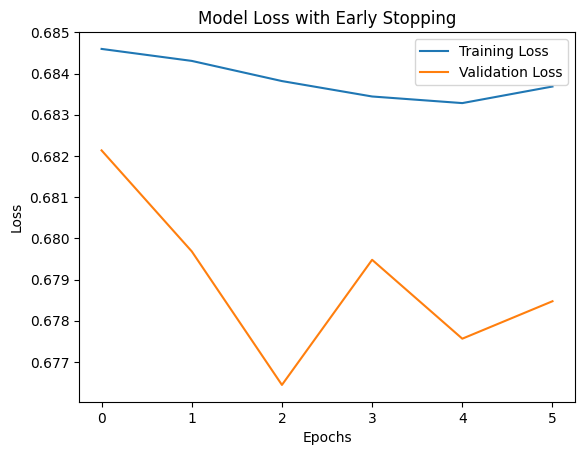

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_combined_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_combined_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_combined_2.history['loss'], label='Training Loss')
plt.plot(history_combined_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# No augmentation for the validation set, only rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [25]:
# For each model, after you have trained them:
import numpy as np

def print_best_val_acc_and_epoch(history, label):
    best_acc = max(history.history['val_accuracy'])
    best_epoch = np.argmax(history.history['val_accuracy']) + 1
    print(f"{label}: Best val_accuracy={best_acc:.3f} at epoch {best_epoch}")

print_best_val_acc_and_epoch(history_model_basic, "Baseline")
print_best_val_acc_and_epoch(history_l2, "L2 Regularization")
print_best_val_acc_and_epoch(history_model_dropout, "Dropout")
print_best_val_acc_and_epoch(history_combined_1, "Dropout+L2 (mod.)")
print_best_val_acc_and_epoch(history_combined_2, "Dropout+L2 (strong)")

Baseline: Best val_accuracy=0.838 at epoch 7
L2 Regularization: Best val_accuracy=0.837 at epoch 7
Dropout: Best val_accuracy=0.820 at epoch 8
Dropout+L2 (mod.): Best val_accuracy=0.808 at epoch 2
Dropout+L2 (strong): Best val_accuracy=0.609 at epoch 3


In [27]:
best_acc = max(history_model_basic.history['val_accuracy'])
best_epoch = np.argmax(history_model_basic.history['val_accuracy']) + 1

In [28]:
best_acc = max(history_l2.history['val_accuracy'])
best_epoch = np.argmax(history_l2.history['val_accuracy']) + 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━

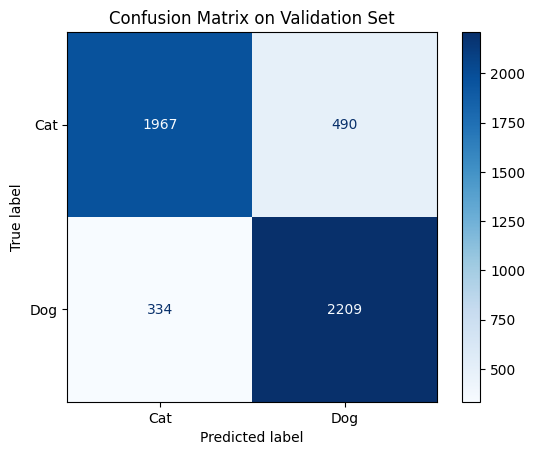

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

val_steps = val_generator.samples // val_generator.batch_size + 1
val_generator.reset()
y_true = []
y_pred = []

for _ in range(val_steps):
    x_batch, y_batch = next(val_generator)
    y_true.extend(y_batch)
    preds = model_l2.predict(x_batch)  # Use your actual model variable here
    y_pred.extend((preds > 0.5).astype(int).flatten())

y_true = np.array(y_true[:val_generator.samples])
y_pred = np.array(y_pred[:val_generator.samples])

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Validation Set')
plt.show()

In [33]:
preds = model_combined_1.predict(x_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

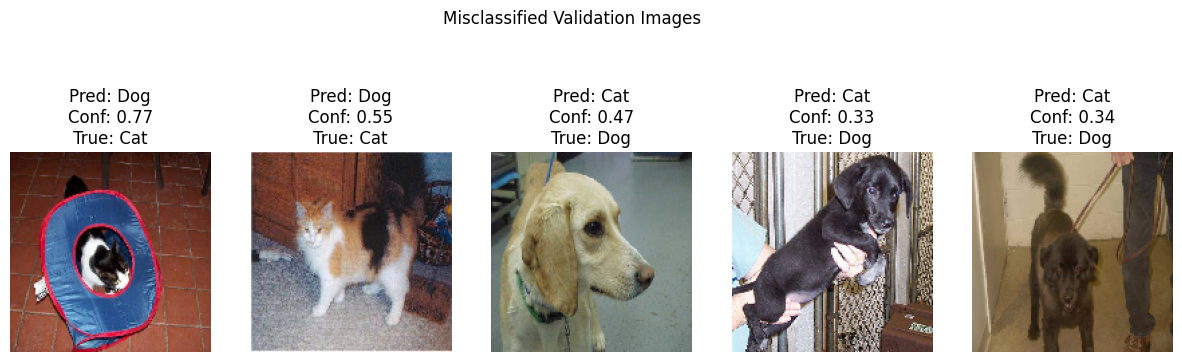

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Use your actual model variable name here
best_model = model_combined_1  # or model_l2, model_dropout, etc.

val_steps = val_generator.samples // val_generator.batch_size + 1
val_generator.reset()
y_true = []
y_pred_prob = []
images = []

for _ in range(val_steps):
    x_batch, y_batch = next(val_generator)
    preds = best_model.predict(x_batch)  # <<-- Use your model variable
    y_true.extend(y_batch)
    y_pred_prob.extend(preds.flatten())
    images.extend(x_batch)

y_true = np.array(y_true[:val_generator.samples])
y_pred_prob = np.array(y_pred_prob[:val_generator.samples])
images = np.array(images[:val_generator.samples])

y_pred_class = (y_pred_prob > 0.5).astype(int)
misclassified_idx = np.where(y_pred_class != y_true)[0]

class_names = ['Cat', 'Dog']  # Adjust if your class order is different

num_to_display = 5
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_idx[:num_to_display]):
    plt.subplot(1, num_to_display, i+1)
    plt.imshow(images[idx])
    plt.axis('off')
    pred_label = class_names[y_pred_class[idx]]
    true_label = class_names[int(y_true[idx])]
    confidence = y_pred_prob[idx]
    plt.title(f"Pred: {pred_label}\nConf: {confidence:.2f}\nTrue: {true_label}")
plt.suptitle("Misclassified Validation Images")
plt.show()